<a href="https://colab.research.google.com/github/Robin-gl-pixel/nlp_project/blob/main/ml_for_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Download required files if needed

In [ ]:
# Train data
!pip install --upgrade --no-cache-dir gdown --quiet
!gdown 1CA4obGlDXfpk_ZWe758idTzvhDkUQPDy
!gdown 1PMOTlRopWR5Jzf06Vb5GinVZubXyalEB

Downloading...
From: https://drive.google.com/uc?id=1CA4obGlDXfpk_ZWe758idTzvhDkUQPDy
To: /content/VIX_1w.json
100% 263M/263M [00:06<00:00, 39.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PMOTlRopWR5Jzf06Vb5GinVZubXyalEB
To: /content/EURUSDV1M_1w.json
100% 263M/263M [00:06<00:00, 38.4MB/s]


In [ ]:
# test data
!pip install --upgrade --no-cache-dir gdown --quiet
!gdown 1QyZ07R-o64pgqC6COfhijLTeLOPPzRtM
!gdown 1d0YuD1dzsLd2ke__h5qZwOJbGwm3gF-b
!gdwon 11bbSx8QSMPb9-k8JMSVLY-HYAWNEuurH
!gdown 1v1TsrK9uX_LvoFAbHLASGM9XZPYmxUyD

Downloading...
From: https://drive.google.com/uc?id=1QyZ07R-o64pgqC6COfhijLTeLOPPzRtM
To: /content/test_VIX_1w.json
100% 30.4M/30.4M [00:01<00:00, 20.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1d0YuD1dzsLd2ke__h5qZwOJbGwm3gF-b
To: /content/test_EURUSDV1M_1w.json
100% 30.4M/30.4M [00:01<00:00, 16.7MB/s]
/bin/bash: gdwon: command not found
Downloading...
From: https://drive.google.com/uc?id=1v1TsrK9uX_LvoFAbHLASGM9XZPYmxUyD
To: /content/EURUSDV1M_1w_truth.json
100% 11.6k/11.6k [00:00<00:00, 12.9MB/s]


# Get Data

In [ ]:
train_vix_json = 'VIX_1w.json'
train_eur_json = 'EURUSDV1M_1w.json'

In [ ]:
def get_json_file(json_path):
  with open(json_path, 'r') as json_path:
      json_file = json.load(json_path)
  return json_file
  
train_vix = get_json_file(train_vix_json)
train_eur = get_json_file(train_eur_json)

In [ ]:
def process_json(json_data):

  for individual in json_data:
    for day_of_speech in individual['speech']:
      for bank in day_of_speech.keys():
        day_of_speech[bank] = '' if len(day_of_speech[bank]) == 0 else day_of_speech[bank][0].strip('\" ')

process_json(train_vix)
process_json(train_eur)

In [ ]:
def get_list_speeches(data, bank='FED'):
  N = len(data)
  T = 20
    
  speech_set = set()
  speech_list = []

  for sample in range(N):
    for day in range(T):
      speech = data[sample]['speech'][day][bank]
      if (speech not in speech_set) and (len(speech) != 0):
        speech_set.add(speech)
        speech_list.append(speech)
  
  return speech_list

fed_speech_vix = get_list_speeches(train_vix, bank='FED')
ecb_speech_vix = get_list_speeches(train_vix, bank='ECB')

fed_speech_eur = get_list_speeches(train_eur, bank='FED')
ecb_speech_eur = get_list_speeches(train_eur, bank='ECB')

In [ ]:
def save_embedding(emb_file, file_name):
  with open(file_name, 'wb') as f:
    np.save(f, emb_file)

# Data exploration

### General exploration

In [ ]:
# Number of different articles in the database

print("There are {nb_speech} speeches from of ECB for VIX in the data base".format(nb_speech=len(ecb_speech_vix)))
print("There are {nb_speech} speeches from of FED for VIX in the data base".format(nb_speech=len(fed_speech_vix)))


print("There are {nb_speech} speeches from of ECB for EUR in the data base".format(nb_speech=len(ecb_speech_eur)))
print("There are {nb_speech} speeches from of FED for EUR in the data base".format(nb_speech=len(fed_speech_eur)))

There are 1262 speeches from of ECB for VIX in the data base
There are 417 speeches from of FED for VIX in the data base
There are 1262 speeches from of ECB for EUR in the data base
There are 417 speeches from of FED for EUR in the data base


In [ ]:
all_speeches = [*ecb_speech_vix, *fed_speech_vix, *ecb_speech_eur, *fed_speech_eur]

mean_nb_char = int(sum(map(len, all_speeches)) / len(all_speeches))
print("The mean length of content in characters is {}".format(mean_nb_char))

The mean length of content in characters is 20176


The average number of character of a speech is hudge so we have to find a way to by pass that


In [ ]:
%matplotlib inline

# df['title_len'] = df.title.apply(lambda x: len(x.split(' ')) )
# df['content_len'] = df.content.apply(lambda x: len(x.split(' ')) )

df_speech_basic_info = pd.DataFrame(
    {
        "Number of characters in speech" : list(map(len, all_speeches)),
        "Number of words in speech": list(map(lambda x: len(x.split(" ")), all_speeches))
        }
    )

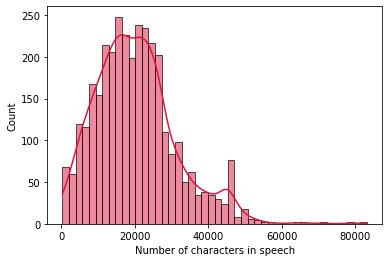

In [ ]:
sns.histplot(data=df_speech_basic_info , x="Number of characters in speech", kde=True,  color='crimson')

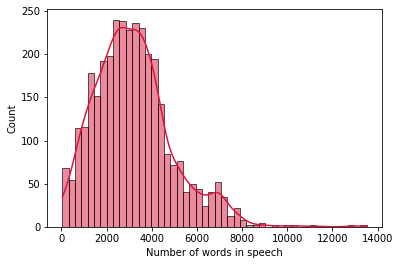

In [ ]:
sns.histplot(data=df_speech_basic_info , x="Number of words in speech", kde=True,  color='crimson')

In [ ]:
print(df_speech_basic_info.std())

print(df_speech_basic_info.mean())


Number of characters in speech    11038.060363
Number of words in speech          1731.877060
dtype: float64
Number of characters in speech    20176.807624
Number of words in speech          3178.986897
dtype: float64


Given the very high average number of words in each speech we will need a way to summarize those texts and extract the important information within those speeches.

### Most recurrent words

How many different words is there in my vocabulary and what are the most frequent ones?

In [ ]:
from collections import Counter
counts = Counter()
for sentence in all_speeches:
    counts.update(word.strip('.,?!"\'').lower() for word in sentence.split())

In [ ]:
sorted(counts, key=counts.get, reverse=True)[:5]
# these are all stop words Lets remove them and see the most frequent words

['the', 'of', 'to', 'and', 'in']

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

In [ ]:
from collections import Counter
counts_no_stop_words = Counter()
stop_words = stopwords.words('english')
for sentence in all_speeches:
    counts_no_stop_words.update(word.strip('.,?!"\'').lower() for word in sentence.split() if word not in stop_words)

In [ ]:
print(sorted(counts_no_stop_words, key=counts.get, reverse=True)[:5])
print( '%s "words" in the speeeches without the stop words' % (len(set(counts_no_stop_words))) )

['financial', 'the', 'policy', 'euro', 'monetary']
105807 "words" in the speeeches without the stop words


The size of the vocabulary is huge!

### Check if Zips law applies

  0%|          | 0/3 [00:00<?, ?it/s]

Counter({'the': 645360, ',': 555272, 'of': 366638, 'to': 292668, 'and': 288822, 'in': 231922, 'a': 167010, 'that': 122444, 'is': 105232, 'for': 95654, 'on': 71232, 'be': 63524, 'as': 63320, 'financial': 62920, 'have': 60668, 'are': 58056, 'by': 57966, 'The': 57618, 'with': 50768, ')': 43426, 'has': 43074, '(': 42826, 'not': 41594, 'this': 41244, 'policy': 38554, 'will': 37448, 'at': 36804, 'it': 35240, 'I': 35226, 'we': 34616, 'from': 34404, 'euro': 33546, 'an': 32630, 'more': 31822, 'which': 31520, 'banks': 31414, 'In': 30784, 'monetary': 30498, 'market': 30218, 'their': 28418, 'also': 27750, '’': 27622, 'can': 27520, 'area': 26504, ':': 26304, 'would': 25636, 'our': 24890, 'been': 24684, 'or': 24572, 'economic': 24098, '“': 22962, '–': 22556, '”': 21898, 'was': 21030, 'these': 20840, 'its': 20588, 'ECB': 20586, 'inflation': 20276, 'This': 20190, 'de': 20142, 'central': 19696, 'some': 19168, 'other': 18930, '.': 18742, 'European': 18146, 'crisis': 18106, 'should': 17664, 'credit': 176

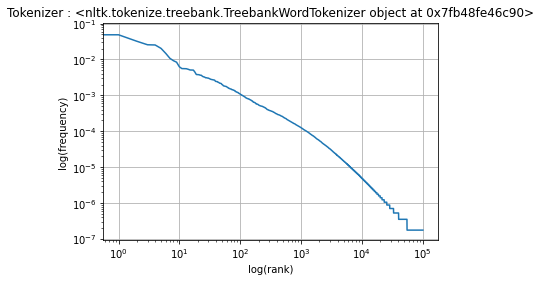

Counter({'the': 645126, ',': 555252, 'of': 366636, 'to': 292636, 'and': 288840, 'in': 231906, 'a': 166932, 'that': 122448, 'is': 105184, 'for': 95644, 'on': 71214, 'be': 63520, 'as': 63316, 'financial': 62822, 'have': 60644, 'are': 58034, 'by': 57970, 'The': 55378, 'with': 50758, ')': 43426, 'has': 43066, '(': 41448, 'this': 41242, 'policy': 38532, 'not': 38034, 'will': 37444, 'at': 36782, 'it': 35218, 'I': 35138, 'we': 34594, 'from': 34406, 'euro': 33512, 'an': 32610, 'more': 31790, 'which': 31520, 'banks': 31422, 'In': 30732, 'monetary': 30440, 'market': 30198, 'their': 28416, 'also': 27750, '’': 27622, 'area': 26500, ':': 25666, 'would': 25610, 's': 25120, 'our': 24882, 'been': 24684, 'or': 24578, 'economic': 24064, 'can': 24056, '–': 23174, '”': 21898, 'was': 21026, 'these': 20840, 'its': 20588, 'ECB': 20556, 'inflation': 20232, 'This': 20164, 'de': 20150, 'central': 19676, 'some': 19166, 'other': 18924, '.': 18514, 'crisis': 18058, 'European': 18014, 'should': 17640, 'credit': 175

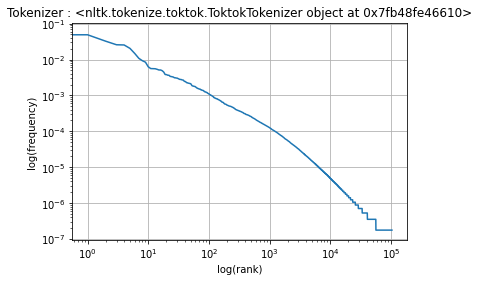

Counter({'the': 644622, ',': 555406, '.': 460432, 'of': 366600, 'to': 292412, 'and': 288330, 'in': 231770, 'a': 166638, 'that': 121956, 'is': 104990, 'for': 95458, 'on': 71442, 'be': 63778, 'as': 63048, 'financial': 62910, 'have': 60558, 'are': 57938, 'by': 57896, 'The': 57764, 'with': 50780, 'has': 42964, '(': 42750, 'policy': 41864, ')': 41742, 'this': 41644, 'not': 38176, 'will': 37394, 'at': 36776, 'it': 36158, 'I': 35454, 'euro': 34624, 'banks': 34600, 'we': 34470, 'from': 34358, 'an': 32636, 'market': 32588, 'more': 31966, 'which': 31254, 'In': 30804, 'area': 30608, 'monetary': 30498, 'their': 28418, 'also': 27726, '’': 27622, 'would': 25534, 'our': 24872, 'or': 24730, 'been': 24716, ':': 24578, 'economic': 24112, 'can': 23916, '–': 23174, '“': 22962, 'crisis': 22274, 'inflation': 21962, '”': 21898, 'ECB': 21486, 'markets': 21148, 'was': 20994, 'these': 20850, 'its': 20580, 'This': 20190, 'de': 20158, 'central': 19724, 'other': 19236, 'some': 19146, 'growth': 18884, 'risk': 18804

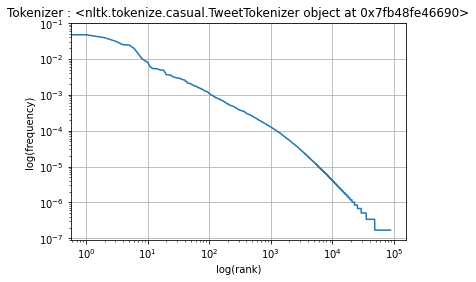

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import TweetTokenizer
from tqdm.notebook import tqdm

tokenizers = [TreebankWordTokenizer(), ToktokTokenizer(), TweetTokenizer()]

for tok in tqdm(tokenizers):
  arr = list(map(lambda x: tok.tokenize(x), all_speeches))
  # We flatten the list. We could use this : arr = reduce(add, arr)   but it would take too much time.
  arr = [ x for X in arr for x in X]
  # We use reduce to concatenate all the lists in arr, but we don't use "set" 
  # so that we can count occurencies with a Counter object 
  c = Counter(arr)
  print(c)
  # Formating the counter object to a proper dataset
  d = pd.DataFrame(c, index=['occurrences']).transpose().reset_index()
  d.columns=['word', 'occurences']
  # Computing frequencies instead of occurences
  nb_total = d.occurences.sum()
  d['freq'] = d.occurences.apply(lambda x: x/nb_total)
  # Sorting by frequency, most frequent word at the top of the df
  d = d.sort_values('freq', ascending=False)
  plt.figure()
  plt.grid()
  plt.xscale('log')  # Using log scale
  plt.yscale('log')  # Using log scale
  plt.xlabel('log(rank)')
  plt.ylabel('log(frequency)')
  plt.title("Tokenizer : {0}".format(tok))
  x = list(range(d.shape[0]))
  plt.plot(x, d.freq)
  plt.show()

As see above Zipff's laws applies in this case.

### Check special characters in speeches

In [ ]:
import re
# Regular expression that matches any sequence of numbers:
int_prog = re.compile('[0-9]+')
float_prog = re.compile('[0-9]+\.?[0-9]*')
percent_prog = re.compile('[0-9]+\.?[0-9]*%')
year_prog = re.compile('[12][089][0-9][0-9]') # a year between 1800 and 2099. # 1[89][0-9][0-9]|20[0-9][0-9]
#df1 = df.drop_duplicates('content')  # Don't forget to compute over unique elements if it applies
# Calculating number of matches for every abstract
progs = [int_prog, float_prog, percent_prog, year_prog]
nb_types = ['ints', 'floats', 'percents', 'years']

types_recap = {}
for prog, nb_type in zip(progs, nb_types):
  types_recap[nb_type] = list(map(lambda x: len(prog.split(x))-1, all_speeches))

In [ ]:
print({ key: np.mean(value) for key, value in types_recap.items()})

{'ints': 53.21262656343061, 'floats': 50.443716497915425, 'percents': 3.692078618225134, 'years': 18.847528290649198}


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb48ffeed90>,
      dtype=object)

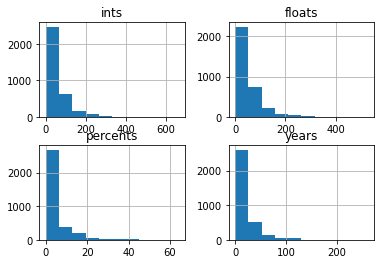

In [ ]:
pd.DataFrame(types_recap).hist()

In [ ]:
nb_percent_types = [''.join([t, '%']) for t in nb_types]

nb_types_percent = dict()
for prog, nb_type in zip(progs, nb_percent_types):
  nb_types_percent[nb_type] = list(map(lambda x: 100 *(1 - len(''.join(prog.split(x)))/len(x)), all_speeches))

In [ ]:
print({ key: np.mean(value) for key, value in nb_types_percent.items()})

{'ints%': 0.612969389488204, 'floats%': 0.6528877999353551, 'percents%': 0.058384496653529794, 'years%': 0.3517288870605104}


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb490143d90>,
      dtype=object)

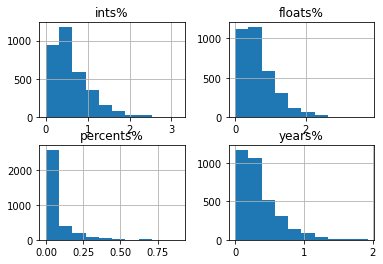

In [ ]:
pd.DataFrame(nb_types_percent).hist()

The number of ints and floats in those speeches is very low, but regarding our goal we may need to implement a special treatment for the numerical values since they might be very interesting to use in our problem.

### Languages

#### Identify languages and compute them

In [ ]:
!pip install langdetect

     |████████████████████████████████| 981 kB 29.5 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=0d0a59812f2e8b7fedc817b6cbe5153d33e9048db3c9e310bf7e86f91b6aebb4
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

def get_languages(speech_list):
  lang = []
  for speech in speech_list:
    lang.append(detect(speech))
  return np.array(lang)

In [ ]:
lang_fed_vix = get_languages(fed_speech_vix)
lang_ecb_vix = get_languages(ecb_speech_vix)
print(f"FED speeches language : {np.unique(lang_fed_vix, return_counts=True)}")
print(f"ECB speeches language : {np.unique(lang_ecb_vix, return_counts=True)}")

FED speeches language : (array(['de', 'en', 'es', 'fr'], dtype='<U2'), array([ 10, 399,   4,   4]))
ECB speeches language : (array(['de', 'en', 'es', 'fr', 'it'], dtype='<U2'), array([  45, 1197,   12,    5,    3]))


In [ ]:
lang_fed_eur = get_languages(fed_speech_eur)
lang_ecb_eur = get_languages(ecb_speech_eur)
print(f"FED speeches language : {np.unique(lang_fed_eur, return_counts=True)}")
print(f"ECB speeches language : {np.unique(lang_ecb_eur, return_counts=True)}")

FED speeches language : (array(['de', 'en', 'es', 'fr'], dtype='<U2'), array([ 10, 399,   4,   4]))
ECB speeches language : (array(['de', 'en', 'es', 'fr', 'it'], dtype='<U2'), array([  45, 1197,   12,    5,    3]))


#### Delete speeches with other languages

In [ ]:
fed_speech_vix = np.array(fed_speech_vix)[lang_fed_vix == 'en']
ecb_speech_vix = np.array(ecb_speech_vix)[lang_ecb_vix == 'en']

fed_speech_eur = np.array(fed_speech_eur)[lang_fed_eur == 'en']
ecb_speech_eur = np.array(ecb_speech_eur)[lang_ecb_eur == 'en']

print(len(ecb_speech_vix))
print(len(fed_speech_vix))

1197
399


# Summary of speeches

Since we saw in the data exploration that we are working with very long sentences, we implement a summarisation of these speeches in order not to lose the important information in the very large sentences. To do that, we use the NLTK which is based on the use of basic sentences scores.

Pre-trained models for summarization being quite heavy to run, we have generated summaries by simply selecting the top k sentences which are containing the words that appear the most (excluding basic English stop words). The summaries we computed were 12 sentences long, which is more or less equivalent to 500 tokens. 

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Get best k sentences based on word frequencies

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

def weight_freq(speech):
    stop_words = stopwords.words('english')
    word_frequencies = {}
    for word in word_tokenize(speech):
        if word not in stop_words:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1

    maximum_frequncy = max(word_frequencies.values())
    for word in word_frequencies.keys():
        word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

    return word_frequencies


def sent_score(sent_speech, word_freq):
    sentence_scores = {}
    for sent in sent_speech:
        for word in word_tokenize(sent.lower()):
            if word in word_freq.keys():
                if len(sent.split(' ')) < 50:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_freq[word]
                    else:
                        sentence_scores[sent] += word_freq[word]
    return sentence_scores

import heapq

def get_summary(sent_scores, top_sent):
    summary_sentences = heapq.nlargest(top_sent, sent_scores, key=sent_scores.get)
    summary = ' '.join(summary_sentences)
    return summary

def summarize(speech, top_sent=8):
    word_freq = weight_freq(speech)
    scores_sent = sent_score(sent_tokenize(speech), word_freq)
    summ = get_summary(scores_sent, top_sent)

    return summ

# example with one speech
se = 0
s = summarize(fed_speech_vix[se], 12)
s

'Jiménez, G., Ongena, S., Peydró and J. Saurina (2011), Macroprudential Policy, Countercyclical Bank Capital Buffers and Credit Supply: Evidence from the Spanish Dynamic Provisioning Experiments, Bank of Spain mimeo. Hellmann, T., Murdock, K. and J. Stiglitz (2000), Liberalization, Moral Hazard in Banking, and Prudential Regulation: Are Capital Requirements Enough?, American Economic Review. [5]See Mian and Sufi (2009); Maddaloni and Peydró (2011); Jiménez, Mian, Peydró and Sufi (2011), Altunbas, Marqués and Gambacorta (2010). Banks’ capital reserves, transparency, funding, risk management, corporate governance and both micro and, especially, macro supervision and regulation need to be adjusted. On that same subject, we should welcome the changes made to EU and global banking regulations and supervision, both micro and macro-based: for example, the Basel III package of regulations (level and quality of capital, countercyclical buffers of capital, liquidity ratio. Matutes, C. and X. Viv

## Compute a summary for each speech :

In [ ]:
fed_speech_sum_eur = []
ecb_speech_sum_eur = []

fed_speech_sum_vix = []
ecb_speech_sum_vix = []



banks = ['ECB', 'FED']

for b in banks:
    for speech in eval(b.lower()+"_speech_eur"):
        eval(b.lower()+"_speech_sum_eur").append(summarize(speech, 12))
    for speech in eval(b.lower()+"_speech_vix"):
        eval(b.lower()+"_speech_sum_vix").append(summarize(speech, 12))

In [ ]:
summuarised_sentences = np.array([*fed_speech_sum_eur,*ecb_speech_sum_eur])
save_embedding(summuarised_sentences, "summuarised_sentences.npy")

# Embeddings

### TF-IDF

The speeches are too heavy to be able to train on the full speeches thus we only use the 5 sentences chosen above.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def get_tf_idf_emedding(speech):

  vectorizer = TfidfVectorizer()
  sentences_vec_tf = vectorizer.fit_transform(speech)
  return sentences_vec_tf

In [ ]:
sentences_vec_tf = get_tf_idf_emedding(
    summuarised_sentences,
    )

In [ ]:
sentences_vec_tf.shape

(1679, 11034)

### Compute embeddings with sentence transformers

We compute the speech embedding using SentenceTransformers, a framework for state-of-the-art sentence embeddings. The initial work is described in our paper Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks.

In the documentation we have seen that this module performs best when given as an input a limited nuber of wordpieces (by default the max length is set to 128). However as seen in the data exploration the sequences we have as inputs are much bigger than this. So what we propose here is to generate new features by using asymmetric semantic search. In other words we are computing embeddings of all sentences within a speech and are trying to find which ones are answering the best to a specific query. In practice, we have computed embeddings for all sentences in one speech using msmarco model, that one can find in the sentencetransformers library. (Reimers and Gurevych, 2019), Then we have retrieved the top 5 sentences for which the cosine similarity is highest compared to the following query: will the index stock value will go up or down, what is the trend ?

We keep the cosine similarity as it indicates the ability of each sentence to answer the above question and it will be use a a weighting parameter.


In [ ]:
%%capture
!pip install sentence_transformers

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sentence_transformers import SentenceTransformer

def get_embeddings(model_name, speech_list, max_length, verbose=True):

    embeddings = []
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    model = SentenceTransformer(model_name, device=device)
    model.max_seq_length = max_length
    for speech in speech_list:
      sentences = sent_tokenize(speech)
      embeddings.append(model.encode(sentences, convert_to_numpy=True, 
                                     batch_size=128, show_progress_bar=verbose))
    return embeddings


In [ ]:
from sentence_transformers import util

query_str = "Will the stock market index value go up or down, what is the trend ?"
model_name = 'msmarco-MiniLM-L-6-v3'

def get_sentence_transformers_embeddings(
    fed_speech_eur,
    ecb_speech_eur,
    query_str = query_str,
    model_name=model_name,
    ):
  
  fed_sentences_embeddings_eur = get_embeddings(model_name, fed_speech_eur, 512, verbose=False)
  ecb_sentences_embeddings_eur = get_embeddings(model_name, ecb_speech_eur, 512, verbose=False)

  all_speech = fed_speech_eur + ecb_speech_eur
  all_sentences = fed_sentences_embeddings_eur + ecb_sentences_embeddings_eur

  model = SentenceTransformer(model_name)

  top_sentences, top_scores, true_sent = [], [], []
  query = model.encode(query_str)

  for i, speech in enumerate(all_sentences):
    sents = sent_tokenize(all_speech[i])
    scores = util.cos_sim(query, speech)
    if scores.size(1) >= 5:
      cosine, indices = torch.topk(scores, 5)
      indices = indices.tolist()[0]
    else:
      indices = [0] * 5
    top_scores.append(cosine.tolist()[0])
    top_sentences.append(np.take(speech, indices, axis=0))
    true_sent.append([sents[idx] for idx in indices])
  return top_scores, top_sentences, true_sent

In [ ]:
top_scores_st, top_sentences_st, true_sent_st = get_sentence_transformers_embeddings(fed_speech_eur,ecb_speech_eur)

In [ ]:
st_embedding = np.array(top_sentences_st)
print("final embedding shape: ", st_embedding.shape)
st_embedding_cosine = np.array(top_scores_st)
print("final cosine shape: ", st_embedding_cosine.shape)
st_chosen_sentences = np.array(true_sent_st)
print("final cosine shape: ", st_chosen_sentences.shape)


final embedding shape:  (1679, 5, 384)
final cosine shape:  (1679, 5)
final cosine shape:  (1679, 5)


In [ ]:
save_embedding(st_embedding, "sentence_transformers_embedding.npy")
save_embedding(st_embedding_cosine, 'sentence_transformers_embedding_cosine.npy')
save_embedding(st_chosen_sentences, 'sentence_transformers_chosen_5.npy')

### Sentiment Analysis

Another possible embedding is to analyse the sentiment carried by the speech to be able to predict wether the stock price will increase or decrease.

So we apply a sentiment analysis pipeline on a summarize version of each speech. The basic idea behind this is that a speech being classified as negative may induce a higher probability for the
stock market value to go down. To summarize the speeches, as on average, one speech contains nearly 3000 words, which is intractable to use sentiment analysis pre-trained model, which usually can take
between 512 and 1024 tokens, we use the basi basic method.

We then computed a sentiment label on each summary
among negative, positive or neutral (-1, 0, 1), using
a pre-trained model, fine-tuned on some financial data.

#### The pipeline

In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 27.4 MB/s 
     |████████████████████████████████| 596 kB 68.9 MB/s 
     |████████████████████████████████| 77 kB 8.0 MB/s 
     |████████████████████████████████| 6.6 MB 60.2 MB/s 
     |████████████████████████████████| 895 kB 68.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import pipeline

model = "mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis"
clf = pipeline("sentiment-analysis", model=model, truncation=True)

Downloading:   0%|          | 0.00/933 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/313M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/333 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
def convert_sentiment(speech_sum):
  speech_sentiment = clf(speech_sum)

  labels = []
  for dico in speech_sentiment:

    if dico['label'] == 'neutral':
      labels.append(0)
    elif dico['label'] == 'positive':
      labels.append(1)
    else:
      labels.append(-1)
  return labels


#### On summarised

In [ ]:
y_fed_fine_eur = convert_sentiment(fed_speech_sum_eur)
y_ecb_fine_eur = convert_sentiment(ecb_speech_sum_eur)
sentiment_analysis_summarised = np.array(y_fed_fine_eur + y_ecb_fine_eur)


In [ ]:
save_embedding(sentiment_analysis_summarised, "sentiment_analysis_summarised.npy")

#### On selected sentence with Sentence Transformers

In [ ]:
sentiments = []
for sentences in true_sent_st:
  sentiments.append(
      convert_sentiment(sentences)
  )
for i, seq in enumerate(sentiments):
  if len(seq)==0:
    sentiments[i] = [0] * 5
sentiment_analysis_st = np.array(sentiments)

In [ ]:
save_embedding(sentiment_analysis_st, "sentiment_analysis_sentence_transformers.npy")

### Conclusion Embedding

Our different embeddings led us to two methods to extract the important information:
- A summarizing process based on the words frequencies
- The selection of a given number of sentences among all the ones present in the speeches
This embeddings are:
- TFIDF Vectorizer, representing the speeches with the frequencies of each word
- Sentence Transformers, a BERT-based module with which we select the 5 most important sentences along with their importance measure
- Sentiment Analysis, sorting each speech into one of 3 categories (positive, negative and neutral)
These last ones give several representations of the speeches, the task in then to compare and select the most efficient representation in our situation.

# Build Dataset

In [ ]:
def build_dataset(data, fed_list=None, ecb_list=None):

    N = len(data)
    T = 20
    banks = ['ECB', 'FED']
    X = np.empty((N, 2), dtype=object)
    y = np.empty(N)
    
    if fed_list is None:
      fed_list = get_list_speeches(data, bank='FED')
    if ecb_list is None:
      ecb_list = get_list_speeches(data, bank='ECB')

    for i in range(len(data)):
        idx_ecb = []
        idx_fed = []
        for day in range(T):
          for b in banks:
            speech = data[i]['speech'][day][b] 
            if (len(speech) == 0) or (speech not in eval(b.lower()+"_list")):
              eval("idx_"+b.lower()).append(0)
            else:
              eval("idx_"+b.lower()).append(eval(b.lower()+"_list").index(speech))

        #X[i, 0] = np.array(data[i]['stock'])
        X[i, 0] = np.array(idx_fed)
        X[i, 1] = np.array(idx_ecb)
        
        y[i] = data[i]['target_classif']

    return X, y

In [ ]:
fed_speech_vix = list(fed_speech_vix)
ecb_speech_vix = list(ecb_speech_vix)

fed_speech_eur = list(fed_speech_eur)
ecb_speech_eur = list(ecb_speech_eur)

X_train_vix, y_train_vix = build_dataset(train_vix, fed_list=fed_speech_vix, ecb_list=ecb_speech_vix)
X_train_eur, y_train_eur = build_dataset(train_eur, fed_list=fed_speech_eur, ecb_list=ecb_speech_eur)

In [ ]:
def _split_fed_ecb(all_data, n_fed):

    zeros_mat = np.zeros(all_data.shape[1:])
    fed_embed = np.insert(all_data[:n_fed], 0, zeros_mat, axis=0)
    ecb_embed = np.insert(all_data[n_fed:], 0, zeros_mat, axis=0)

    return fed_embed, ecb_embed



def create_dataset_only_sentiment(X, y, n_fed, 
                   y_sent=None, cosine=None, sentiments=None,
                   is_reg=False,look_back=20):
  
    n_sample = X.shape[0]
    
    X_train = np.zeros((n_sample, look_back, 9+2))
    y_train = np.zeros((n_sample,))

    y_fed, y_ecb = _split_fed_ecb(y_sent, n_fed)
    cosine_vix, cosine_eur = _split_fed_ecb(cosine, n_fed)
    senti_sent_fed, senti_sent_ecb = _split_fed_ecb(sentiments, n_fed)
    
    for idx in range(n_sample):
        sample = []
        for day in range(look_back):

            fed_idx = int(X[idx, 0][day])
            ecb_idx = int(X[idx, 1][day])

            sent_sum = [y_fed[fed_idx] + y_ecb[ecb_idx]]
            
            sent_fed, sent_ecb = (senti_sent_fed[fed_idx], senti_sent_ecb[ecb_idx])
            cosine_fed, cosine_ecb = (cosine_vix[fed_idx][0], cosine_eur[ecb_idx][0])

            sample.append(np.concatenate((sent_sum,
                                          sent_fed,
                                          sent_ecb,
                                          ), axis=0))
        
        X_train[idx,:,:] = np.array(sample)
        y_train[idx] = y[idx]
        
    return X_train, y_train


# I saw in a paper than only the last few days are halpfull for predicting the stock indices
# SO we only tke into account hte 2 last days
def create_dataset_embed_text(X, y, n_fed, embeddings, look_back=2):
  
    n_sample = X.shape[0]
    
    X_train = np.zeros((n_sample, look_back, embeddings.shape[1],embeddings.shape[2]))
    y_train = np.zeros((n_sample,))

    fed_embed, ecb_embed =  embeddings[:n_fed], embeddings[n_fed:]
    
    for idx in range(n_sample):
        sample = []
        for day in range(look_back):

            fed_idx = int(X[idx, 0][- day])
            ecb_idx = int(X[idx, 1][- day])
            emb = (fed_embed[fed_idx] + ecb_embed[ecb_idx]) / 2
            sample.append(emb)
        
        X_train[idx,:,:] = np.array(sample)
        y_train[idx] = y[idx]

    return X_train, y_train

In this case, the TF-IDF method does not work because the vocabulary is too large.

## Create datasets to use

In [ ]:
# We create a dataset tht is based on our sentiment analysis pipeline only

from sklearn.model_selection import train_test_split

all_data = {}
X_sent, y_sent = create_dataset_only_sentiment(X_train_vix, y_train_vix, y_sent=sentiment_analysis_summarised,
                      n_fed=len(fed_speech_vix),
                      sentiments=sentiment_analysis_st, cosine=st_embedding_cosine)
# We perfomr the mean over each feature for each day
x_sent = np.mean(X_sent[:,:,:], axis=1)
all_data["sentiment_analysis"] = [x_sent, y_sent]
# We create a dataset that uses the embedding of the the speeches that has been sulmuarised 
#sith only one day of lookback because otherwise we have to many features

x_st, y_st = create_dataset_embed_text(X_train_vix, y_train_vix, n_fed=len(fed_speech_vix), embeddings=st_embedding, look_back=1)
x_st = np.mean(x_st, axis=2).reshape(x_st.shape[0], x_st.shape[1]*x_st.shape[3])
all_data["sentence_transformer"] = [x_st, y_st ]



In [ ]:
from sklearn.metrics import classification_report

# Simple models

### Naive model: logistic regression

For the baseline naive model, we will use a logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit




#['fit_time', 'score_time', 'test_score']

def get_model_performance(clf, all_data):
    for embed_name, (X, y)  in all_data.items():
      print("---------------------")
      print(embed_name)      
      cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=4)
      cv_results = cross_validate(clf, X, y, cv=10, return_estimator=True)

      print(" Average Acuracy: ", np.mean(cv_results['test_score']))
      print(" Average Fit time: ", np.mean(cv_results['fit_time']))



clf = LogisticRegression(penalty='l2', class_weight=None, solver='lbfgs', C=100,
                          max_iter=10000, tol=1e-30, random_state=44)
get_model_performance(clf, all_data)


---------------------
sentiment_analysis
 Average Acuracy:  0.589263492063492
 Average Fit time:  0.01318044662475586
---------------------
sentence_transformer
 Average Acuracy:  0.578895238095238
 Average Fit time:  0.4890815019607544


### Support vector machine

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

clf1 = make_pipeline(StandardScaler(),
                     SVC(C=5, kernel='rbf', degree=2, class_weight='balanced', 
                         coef0=0, probability=False, tol=1e-8, random_state=90))
get_model_performance(clf1, all_data)

---------------------
sentiment_analysis
 Average Acuracy:  0.7113079365079364
 Average Fit time:  0.10111603736877442
---------------------
sentence_transformer
 Average Acuracy:  0.5717333333333332
 Average Fit time:  0.2258228063583374


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf3 = make_pipeline(StandardScaler(), 
                     RandomForestClassifier(n_estimators=100, max_depth=5, criterion='entropy',
                                            min_samples_split=2, class_weight='balanced',
                                            random_state=44))
get_model_performance(clf3, all_data)


---------------------
sentiment_analysis
 Average Acuracy:  0.6131619047619048
 Average Fit time:  0.17624430656433104
---------------------
sentence_transformer
 Average Acuracy:  0.5765079365079366
 Average Fit time:  0.5488292932510376


### XGBoost

In [ ]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier(max_depth=4, learning_rate=1e-2, n_estimators=100, 
                           booster='gbtree', reg_alpha=5, reg_lambda=20,
                           objective='binary:logistic', base_score=0.48, 
                           random_state=44)
get_model_performance(xgb_cl, all_data)



---------------------
sentiment_analysis
 Average Acuracy:  0.6004634920634919
 Average Fit time:  0.08298678398132324
---------------------
sentence_transformer
 Average Acuracy:  0.5852825396825396
 Average Fit time:  1.9009156703948975


### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf2 = make_pipeline(StandardScaler(), 
                     KNeighborsClassifier(n_neighbors=5, weights='distance', 
                                          leaf_size=1000, p=1, metric='manhattan'))
get_model_performance(clf2, all_data)

---------------------
sentiment_analysis
 Average Acuracy:  0.7160761904761903
 Average Fit time:  0.0016268491744995117
---------------------
sentence_transformer
 Average Acuracy:  0.5581079365079366
 Average Fit time:  0.007109308242797851


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf4 = GaussianNB(var_smoothing=1e-9)
get_model_performance(clf4, all_data)

---------------------
sentiment_analysis
 Average Acuracy:  0.6132444444444445
 Average Fit time:  0.0020487308502197266
---------------------
sentence_transformer
 Average Acuracy:  0.5629079365079365
 Average Fit time:  0.005915355682373047


### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = make_pipeline(StandardScaler(),
                    GradientBoostingClassifier(n_estimators=200, max_depth=10, loss='exponential',
                                               learning_rate=1e-2, criterion='squared_error', random_state=44))
get_model_performance(clf, all_data)

---------------------
sentiment_analysis
 Average Acuracy:  0.6873460317460316
 Average Fit time:  1.8873436450958252
---------------------
sentence_transformer
 Average Acuracy:  0.5773079365079365
 Average Fit time:  19.390725517272948


### Voting classifiers

In [ ]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('svc', clf1), ('rf', clf3)], voting='hard')
get_model_performance(eclf, all_data)

---------------------
sentiment_analysis
 Average Acuracy:  0.6953460317460316
 Average Fit time:  0.27682247161865237
---------------------
sentence_transformer
 Average Acuracy:  0.5781142857142857
 Average Fit time:  0.7740742921829223


# Sequential model (LSTM, GRU) based on summarization embeddings

### PyTorch dataset

In [ ]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    
    def __init__(self, data, labels):
        self.X, self.Y = [], []
        for x, y in zip(data, labels):
            self.X.append(x)
            self.Y.append(y)
            
    def __len__(self):
        return len(self.Y)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

x, y = create_dataset_embed_text(X_train_vix, y_train_vix, n_fed=len(fed_speech_vix), embeddings=st_embedding, look_back=1)
x = np.mean(x, axis=2)
data = CustomDataset(x, y)

### Splitting original dataset

In [ ]:
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split

VAL_SIZE = 0.25
BATCH_SIZE = 32
SEED = 4

# generate indices: instead of the actual data we pass in integers instead
train_indices, test_indices, _, _ = train_test_split(
    range(len(data)),
    data.Y,
    test_size=VAL_SIZE,
    random_state=SEED
)

# generate subset based on indices
train_split = Subset(data, train_indices)
val_split = Subset(data, test_indices)

# create batches
data_train = DataLoader(train_split, batch_size=BATCH_SIZE, shuffle=True)
data_val = DataLoader(val_split, batch_size=len(test_indices), shuffle=True)

In [ ]:
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split

VAL_SIZE = 0.2
BATCH_SIZE = 32
SEED = 1

# generate indices: instead of the actual data we pass in integers instead
train_indices, test_indices, _, _ = train_test_split(
    range(len(data)),
    data.Y,
    test_size=VAL_SIZE,
    random_state=SEED
)

# generate subset based on indices
train_split = Subset(data, train_indices)
val_split = Subset(data, test_indices)

# create batches
data_train = DataLoader(train_split, batch_size=BATCH_SIZE, shuffle=True)
data_val = DataLoader(val_split, batch_size=len(test_indices), shuffle=True)

### Training

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Sequential_Model(nn.Module):
    
    def __init__(self, embedding_dim, hidden_dim, is_reg=False):
        super().__init__()
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.is_reg = is_reg
 
        self.lstm = nn.LSTM(self.embedding_dim, self.hidden_dim, 
                            num_layers=2, bidirectional=False,
                            dropout=.6, batch_first=True)
        self.gru = nn.GRU(self.embedding_dim, self.hidden_dim,
                          num_layers=1, dropout=0, batch_first=True)
        
        self.fc = nn.Linear(self.hidden_dim, self.hidden_dim//2)
        self.dropout = nn.Dropout(p=.5)
        self.bn_1 = nn.BatchNorm1d(self.hidden_dim)
        self.bn_2 = nn.BatchNorm1d(self.hidden_dim)
        self.linear = nn.Linear(self.hidden_dim//2, 1)

    def forward(self, seq_inputs):
        # seq_inputs is of shape : (batch_size, seq_length, embedding_dim + 1)
        n_samples = seq_inputs.size(0)
        
        (hn_t, c_t) = (torch.zeros(1, n_samples, self.hidden_dim), 
                       torch.zeros(1, n_samples, self.hidden_dim))
        #out = torch.mean(seq_inputs, axis=1)
        out, _ = self.gru(seq_inputs, hn_t)
        #out, _ = self.gru(seq_inputs, hn_t)
        out = F.leaky_relu_(self.fc(self.dropout(out[:,-1,:])))
        #out = self.dropout(out)
    
        out = self.linear(out)
                
        return out.squeeze()

In [ ]:
import torch.optim as optim

seq_model = Sequential_Model(embedding_dim=x.shape[2], hidden_dim=32)
opt = optim.Adam(seq_model.parameters(), lr=1e-4, weight_decay=3.5e-3)

# already contain sigmoid in it
criterion = nn.BCEWithLogitsLoss() 

In [ ]:
from sklearn.metrics import f1_score
def eval_model(model, criterion, evalloader):
    model.eval()
    total_epoch_loss = 0
    total_epoch_acc = 0
    total_epoch_f1 = 0
    with torch.no_grad():
        for i, (x, y) in enumerate(evalloader):
            preds = model(x.float())
            loss = criterion(preds, y)
            pred_0_1 = torch.round(torch.sigmoid(preds))
            num_corrects = torch.sum(torch.eq(pred_0_1, y))
            acc = 100.0 * num_corrects.item()/len(y)
            total_epoch_loss += loss.item()
            total_epoch_acc += acc
            total_epoch_f1 += f1_score(y.detach().numpy(), pred_0_1.detach().numpy())
            

    return total_epoch_loss/(i+1), total_epoch_acc/(i+1), total_epoch_f1/(i+1) 

Epoch 0 : training loss = 0.7057670326056805, train accuracy = 41.85, f1 score = 0.5852
----------------------------------------------------------------------------------------------------
Epoch 0 : validation loss = 0.7044738804498517, validation accuracy = 36.65, f1 score = 0.5337
----------------------------------------------------------------------------------------------------
Epoch 10 : training loss = 0.6819795589491895, train accuracy = 58.05, f1 score = 0.0052
Epoch 20 : training loss = 0.6804774526661441, train accuracy = 57.87, f1 score = 0.0042
Epoch 30 : training loss = 0.6794514959758751, train accuracy = 58.05, f1 score = 0.0035
----------------------------------------------------------------------------------------------------
Epoch 35 : validation loss = 0.6630004906500003, validation accuracy = 63.75, f1 score = 0.0000
----------------------------------------------------------------------------------------------------
Epoch 40 : training loss = 0.6843320644117987, tra

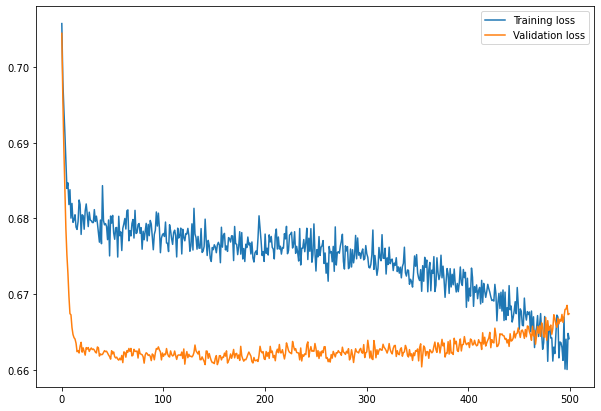

In [ ]:
from termcolor import colored
n_epochs = 500
val_losses, tot_losses = [], []

for i in range(n_epochs):
    acc, losses, f1 = [], [], []
    seq_model.train()
    for idx, (x, y) in enumerate(data_train):       
        opt.zero_grad()
        pred = seq_model(x.float())
        loss = criterion(pred, y)
        loss.backward()
        opt.step()
        
        losses.append(loss.item())
        pred_0_1 = torch.round(torch.sigmoid(pred))
        num_corrects = torch.sum(torch.eq(pred_0_1, y))
        acc.append(100.0 * num_corrects.item()/len(y))
        
        f1.append(f1_score(y.detach().numpy(), pred_0_1.detach().numpy(), zero_division=0))
    
    tot_acc = np.mean(acc)
    val_loss, val_acc, val_f1 = eval_model(seq_model, criterion, data_val)
    val_losses.append(val_loss)
    tot_losses.append(np.mean(losses))
    f1_mean = np.mean(f1)
    
    if i % 10 == 0 :
        print(f'Epoch {i} : training loss = {tot_losses[-1]}, train accuracy = {np.round(tot_acc, 2)}, f1 score = {f1_mean:.4f}')
    if (i % 35 == 0):
        print(colored("--"*50, 'blue'))
        print(colored(f"Epoch {i} : validation loss = {val_loss}, validation accuracy = {np.round(val_acc, 2)}, f1 score = {val_f1:.4f}", 'blue'))
        print(colored("--"*50, 'blue'))

plt.figure(figsize=(10, 7))
plt.plot(np.array(tot_losses), label="Training loss")
plt.plot(np.array(val_losses), label="Validation loss")
plt.legend()
plt.show()

In [ ]:
val_loss, val_acc, _ = eval_model(seq_model, criterion, data_val)
val_acc

61.75298804780876